# Introduction to NLP and Word vectors

## Old-school NLP
[WordNet - A Lexical Database for English](https://wordnet.princeton.edu/)

### WordNet Synonyms

In [44]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tigranfahradyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tigranfahradyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Parts of Speech](https://www.butte.edu/departments/cas/tipsheets/grammar/parts_of_speech.html#:~:text=There%20are%20eight%20parts%20of,as%20grammatically%20within%20the%20sentence.)

In [45]:
wn.synsets("bad")[1].lemmas()[0]

Lemma('bad.a.01.bad')

In [46]:
parts_of_speech = {
    'n': 'noun', 'v': 'verb', 's': 'adj (s)', 'a': 'adj', 'r': 'adv'
}

def print_synonyms(w):
    for synset in wn.synsets(w):
        print(f'{parts_of_speech[synset.pos()]}:'
              f' {", ".join([l.name() for l in synset.lemmas()])}')

In [47]:
print_synonyms('bad')

noun: bad, badness
adj: bad
adj (s): bad, big
adj (s): bad, tough
adj (s): bad, spoiled, spoilt
adj: regretful, sorry, bad
adj (s): bad, uncollectible
adj (s): bad
adj (s): bad
adj (s): bad, risky, high-risk, speculative
adj (s): bad, unfit, unsound
adj (s): bad
adj (s): bad
adj (s): bad, forged
adj (s): bad, defective
adv: badly, bad
adv: badly, bad


In [48]:
print_synonyms('armenia')

noun: Armenia, Republic_of_Armenia, Hayastan


### WordNet Hypernyms
**hypernym**: a word with a broad meaning that more specific words fall under. For example, *color* is a hypernym of *red*

In [49]:
def get_hypernyms(w):
    word = wn.synset(f'{w}.n.01')
    hyper = lambda s: s.hypernyms()
    return list(word.closure(hyper))

In [50]:
get_hypernyms('panda')

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [51]:
get_hypernyms('red')

[Synset('chromatic_color.n.01'),
 Synset('color.n.01'),
 Synset('visual_property.n.01'),
 Synset('property.n.02'),
 Synset('attribute.n.02'),
 Synset('abstraction.n.06'),
 Synset('entity.n.01')]

In [52]:
get_hypernyms('keyboard')

[Synset('device.n.01'),
 Synset('instrumentality.n.03'),
 Synset('artifact.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

## Word embeddings

Exploring pre-trained word embeddings

In [53]:
import gensim
import gensim.downloader

In [54]:
model_glove_wiki = gensim.downloader.load("glove-wiki-gigaword-100")

In [55]:
print(f'Number of vocabulary words: {len(model_glove_wiki.key_to_index)}')

Number of vocabulary words: 400000


In [56]:
model_glove_wiki

In [57]:
w = 'chair'
print(f'Word vector for word {w}:\n {model_glove_wiki.get_vector(w)}')

Word vector for word chair:
 [ 0.0065461  0.37421    0.10797   -0.082747   0.64901    0.30169
 -0.073074   0.93806   -0.63044   -0.51392   -0.37892   -0.58334
  0.35183    1.1785     0.030233  -0.10038   -0.26562    0.23061
 -0.39409   -1.2905    -0.48042    0.24882    0.32405   -0.60272
  0.70835   -0.29148   -0.52192   -0.68477    0.32833    0.1365
 -0.1287     0.54085   -0.17068    0.20286   -0.78958    0.50968
 -0.64833    0.46491    0.50427   -0.15785   -0.54493   -0.35393
  0.66042   -0.71844   -0.48376    0.49241   -0.60408    0.53023
 -0.89401   -0.39691   -0.61351   -0.46707   -0.018895   0.50907
 -0.10905   -2.0831     0.33063    0.3548     0.98301    0.080053
  0.12678   -0.061691  -0.039855   0.33585    0.13318   -0.35239
  0.43726    0.84516    0.21468    0.30733    0.76884    0.44288
  0.74522   -0.26943   -0.6214    -0.13356   -0.53495    0.096564
  0.26305   -0.49739   -0.45149   -0.1694     0.11016   -0.31119
 -0.32883   -0.39835    0.34864   -0.24336    0.33879   -0.9

In [58]:
words_of_interest = [
  'chair', 'table', 'desk', 'floor', 'window', 'seat', 'wall', 
  'peach', 'orange', 'banana', 'kiwi', 'grapes', 'lemon', 'pear',
  'obama', 'bush', 'nixon', 'clinton', 'trump']

In [59]:
top_1000_words = model_glove_wiki.index_to_key[:1000]
top_1000_words

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is',
 'was',
 'said',
 'with',
 'he',
 'as',
 'it',
 'by',
 'at',
 '(',
 ')',
 'from',
 'his',
 "''",
 '``',
 'an',
 'be',
 'has',
 'are',
 'have',
 'but',
 'were',
 'not',
 'this',
 'who',
 'they',
 'had',
 'i',
 'which',
 'will',
 'their',
 ':',
 'or',
 'its',
 'one',
 'after',
 'new',
 'been',
 'also',
 'we',
 'would',
 'two',
 'more',
 "'",
 'first',
 'about',
 'up',
 'when',
 'year',
 'there',
 'all',
 '--',
 'out',
 'she',
 'other',
 'people',
 "n't",
 'her',
 'percent',
 'than',
 'over',
 'into',
 'last',
 'some',
 'government',
 'time',
 '$',
 'you',
 'years',
 'if',
 'no',
 'world',
 'can',
 'three',
 'do',
 ';',
 'president',
 'only',
 'state',
 'million',
 'could',
 'us',
 'most',
 '_',
 'against',
 'u.s.',
 'so',
 'them',
 'what',
 'him',
 'united',
 'during',
 'before',
 'may',
 'since',
 'many',
 'while',
 'where',
 'states',
 'because',
 'now',
 'city',
 'made',
 'like',
 

Similar words are closer in vector space

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_pca(word_list, x_lim=None, y_lim=None, axis='off', 
             model=model_glove_wiki):
  word_vectors_of_interest = np.asarray(
      [model.get_vector(w) for w in word_list])
  word_vectors_in_2d = PCA().fit_transform(word_vectors_of_interest)[:,:2]

  _, ax = plt.subplots(figsize=(8, 6))
  ax.scatter(word_vectors_in_2d[:, 0], word_vectors_in_2d[:, 1])
  for i, w in enumerate(word_list):
    ax.annotate(w, (word_vectors_in_2d[i, 0], word_vectors_in_2d[i, 1]), 
                clip_on=True)
  if x_lim is not None:
    ax.set_xlim(x_lim)
  if y_lim is not None:
    ax.set_ylim(y_lim)
  plt.axis(axis)
  plt.show()

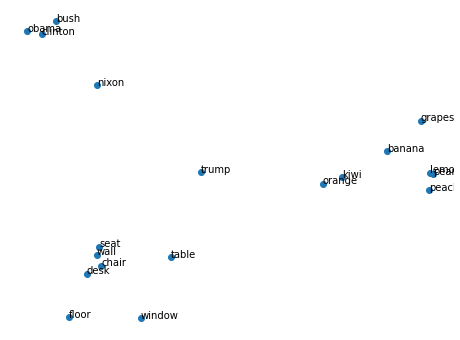

In [61]:
plot_pca(words_of_interest)

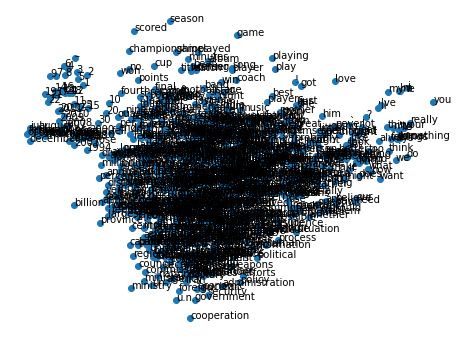

In [62]:
plot_pca(top_1000_words)

In [63]:
w = 'good'
print(f'Most similar words to word {w}:')
model_glove_wiki.most_similar(w, topn=10)

Most similar words to word good:


[('better', 0.893191397190094),
 ('sure', 0.8314563035964966),
 ('really', 0.8297762274742126),
 ('kind', 0.8288268446922302),
 ('very', 0.8260800242424011),
 ('we', 0.8234355449676514),
 ('way', 0.8215398192405701),
 ('think', 0.8205099105834961),
 ('thing', 0.8171301484107971),
 ("'re", 0.8141680955886841)]

### Armenian word embeddings

In [64]:
def plot_pca(word_list, x_lim=None, y_lim=None, axis='off', 
             model=model_glove_wiki):
  word_vectors_of_interest = np.asarray(
      [model.wv.get_vector(w) for w in word_list])
  word_vectors_in_2d = PCA().fit_transform(word_vectors_of_interest)[:,:2]

  _, ax = plt.subplots(figsize=(8, 6))
  ax.scatter(word_vectors_in_2d[:, 0], word_vectors_in_2d[:, 1])
  for i, w in enumerate(word_list):
    ax.annotate(w, (word_vectors_in_2d[i, 0], word_vectors_in_2d[i, 1]), 
                clip_on=True)
  if x_lim is not None:
    ax.set_xlim(x_lim)
  if y_lim is not None:
    ax.set_ylim(y_lim)
  plt.axis(axis)
  plt.show()

You need to upload the model in order for this section to run. Some models can be found [here](https://drive.google.com/drive/folders/1S_bFgENkQu-sn_fJjGC8xaMehncxoqji?usp=sharing).

In [65]:
import os

model_name = 'ft_50_1679k_and_wiki_lr0025_cn36_ss000001.model'
if os.path.exists(model_name):
  armenian_embeddings = gensim.models.fasttext.FastText.load(model_name)
  print(f'Number of vocabulary words: {len(armenian_embeddings.wv.key_to_index)}')
  top_1000_words = armenian_embeddings.wv.index_to_key[:1000]
  plot_pca(top_1000_words, model=armenian_embeddings)
  plot_pca(top_1000_words, (-20, 20), (-20, -10), 
           model=armenian_embeddings)
else:
  armenian_embeddings = None
  print('You need to upload the model file first.')

You need to upload the model file first.


In [66]:
armenian_embeddings.wv.most_similar(positive=['դպրոց'])

AttributeError: 'NoneType' object has no attribute 'wv'

In [22]:
armenian_embeddings.wv.most_similar(positive=['կարմիր'])

[('Սև-կարմիր', 0.8918075561523438),
 ('կապույտ', 0.8345008492469788),
 ('արնակարմիր', 0.8093111515045166),
 ('դեղին', 0.8082975745201111),
 ('կարմիրի', 0.8051129579544067),
 ('նարնջակարմիր', 0.8005646467208862),
 ('կապտակարմիր', 0.7926867008209229),
 ('շիկակարմիր', 0.7907489538192749),
 ('կարմրակապույտ', 0.7717243432998657),
 ('կարմիրն', 0.7715885639190674)]

In [26]:
armenian_embeddings.wv.most_similar(negative=['կարմիր'])

[('Mt', 0.5067793130874634),
 ('th', 0.49410906434059143),
 ('աշխատունակ', 0.4869403839111328),
 ('Յըլ', 0.4710981547832489),
 ('Ասատր', 0.45935001969337463),
 ('Շահսենեմ', 0.45517221093177795),
 ('104-ը', 0.4510742723941803),
 ('64', 0.4486781060695648),
 ('Էթեմ', 0.4444555640220642),
 ('onto', 0.4409806430339813)]

In [28]:
armenian_embeddings.wv.most_similar(positive=['մեծ'])

[('ահռելի', 0.8149975538253784),
 ('մեծամեծ', 0.7984603047370911),
 ('ամեամեծ', 0.7928068041801453),
 ('զգալի', 0.7857367396354675),
 ('մեծավ', 0.7764310836791992),
 ('մեծէ', 0.7753074169158936),
 ('փոքրումեծ', 0.7660236358642578),
 ('մեծաթիվ', 0.7634613513946533),
 ('ավելիմեծ', 0.7528669238090515),
 ('փոքր', 0.7351520657539368)]

In [25]:
def analogy(w1_is_to, w2, as_w3_is_to):
  return armenian_embeddings.wv.most_similar(
      positive=[as_w3_is_to, w2], negative=[w1_is_to])[0][0]

In [26]:
analogy('Երևան', 'Հայաստան', 'Մոսկվա')

'Ռուսաստան'

In [27]:
analogy('Պուտին', 'Ռուսաստան', 'Փաշինյան')

'Հայաստան'

In [28]:
analogy('Հայաստան', 'հայ', 'ԱՄՆ')

'ամերիկացի'

In [29]:
analogy('մեծ', 'փոքր', 'սև')

'սպիտակ'

In [30]:
analogy('ուսուցիչ', 'դպրոց', 'դասախոս')

'պետհամալսարան'

In [31]:
analogy('Գերմանիա', 'գարեջուր', 'Ֆրանսիա')

'շամպայն'

In [32]:
armenian_embeddings.wv.most_similar(
      positive=['Հայաստան'], negative=['Երևան'])

[('եվրոպացիք', 0.6649691462516785),
 ('արտահ', 0.6454819440841675),
 ('հայաստանա', 0.6442304849624634),
 ('հայաստանն', 0.6366807222366333),
 ('հայաստանը', 0.6296848058700562),
 ('որՀայաստանը', 0.5973527431488037),
 ('եվրոպացի', 0.5940942168235779),
 ('Հայաստանն', 0.5940027236938477),
 ('հայաստանցիք', 0.5847570896148682),
 ('բանանն', 0.5826882123947144)]